In [1]:
import pandas as pd

In [2]:
#Load the data

temp_data=pd.read_csv('temperature.csv')
co2_data=pd.read_csv("carbon_emmission.csv")

In [3]:
temp_data.head()

,ObjectId,Country,ISO2,ISO3,F1961,F1962,F1963,F1964,F1965,F1966,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,-0.113,-0.164,0.847,-0.764,-0.244,0.226,...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,0.627,0.326,0.075,-0.166,-0.388,0.559,...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,0.164,0.114,0.077,0.250,-0.100,0.433,...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,0.079,-0.042,0.169,-0.140,-0.562,0.181,...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,0.736,0.112,-0.752,0.308,-0.490,0.415,...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [4]:
co2_data.head()

,ObjectId,Country,Date,Value
0,1,World,1958M03,315.70
1,2,World,1958M04,317.45
2,3,World,1958M05,317.51
3,4,World,1958M06,317.24
4,5,World,1958M07,315.86


In [5]:
#Selecting and computing statistics for temp. changes
temp_values=temp_data.filter(regex='^F').stack()
temp_stats={
    "Mean":temp_values.mean(),
    "Median":temp_values.median(),
    "Variance":temp_values.var()
}

In [6]:
temp_stats

{'Mean': 0.5377713483146068, 'Median': 0.47, 'Variance': 0.4294524831504378}

In [7]:
#Computing statistics for co2 concentration
co2_values=co2_data['Value']
co2_states={
    "Mean":co2_values.mean(),
    "Median":co2_values.median(),
    "Variance":co2_values.var()
}

In [8]:
co2_states

{'Mean': 180.71615286624203, 'Median': 313.835, 'Variance': 32600.00200469294}

In [20]:
import plotly.graph_objects as go
import plotly.express as px

In [35]:
#extracting time series data for plotting
#temperature: averaging across countries for each year
temp_years=temp_data.filter(regex='^F').mean(axis=0)
temp_years.index=temp_years.index.str.replace('F','').astype('int')

#co2: parsing year and averaging monthly data
co2_data['Year']=co2_data['Date'].str[:4].astype('int')
co2_yearly=co2_data.groupby('Year')['Value'].mean()

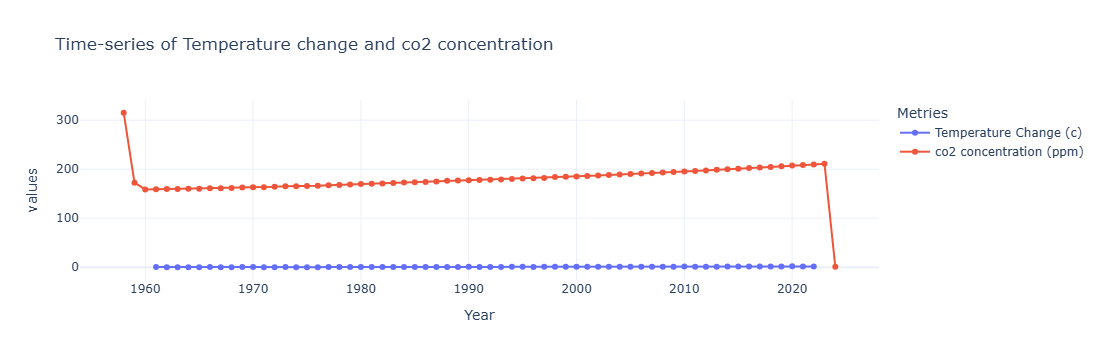

In [48]:
#time-series plot for temperature and co2 levels
fig=go.Figure()
fig.add_trace(go.Scatter(
    x=temp_years.index,
    y=temp_years.values,
    mode='lines+markers',
    name='Temperature Change (c)'
))

fig.add_trace(go.Scatter(
    x=co2_yearly.index,
    y=co2_yearly.values,
    mode='lines+markers',
    name='co2 concentration (ppm)'
))

fig.update_layout(
    title='Time-series of Temperature change and co2 concentration',
    xaxis_title='Year',
    yaxis_title='values',
    template='plotly_white',
    legend_title='Metries'
)
fig.show()